In [72]:
import pandas as pd
from Environments import TrainingEnv
from Environments import TestingEnv

In [73]:
from stable_baselines3.common.env_checker import check_env

In [74]:
data = pd.read_csv('KO_Data.csv')
data.drop(labels=['Date'], axis=1, inplace=True)
data.dropna(inplace=True)
data

,Close,Volume,SMA Ratio,RSI,Bandwidth
0,0.036442,0.027918,0.812065,0.599594,0.089214
1,0.033748,0.082265,0.808792,0.614209,0.076376
2,0.033389,0.051950,0.803936,0.680864,0.066037
3,0.035095,0.066910,0.794504,0.672328,0.058726
4,0.030157,0.055416,0.776057,0.518399,0.057446
...,...,...,...,...,...
4938,1.647321,0.123954,0.504167,0.484029,0.112770
4939,1.660064,0.112748,0.506113,0.524327,0.095914
4940,1.651242,0.108860,0.508709,0.513596,0.089977
4941,1.666925,0.079137,0.512056,0.516203,0.088632


In [75]:
training_data = data.iloc[0:int(0.7 * len(data)), :].copy(deep=True)
validation_data = data.iloc[int(0.7 * len(data)):int(0.8 * len(data)), :].copy(deep=True)
testing_data = data.iloc[int(0.8 * len(data)):, :].copy(deep=True)

In [16]:
training_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
0,0.036442,0.027918,0.812065,0.599594,0.089214
1,0.033748,0.082265,0.808792,0.614209,0.076376
2,0.033389,0.051950,0.803936,0.680864,0.066037
3,0.035095,0.066910,0.794504,0.672328,0.058726
4,0.030157,0.055416,0.776057,0.518399,0.057446
...,...,...,...,...,...
3455,0.856249,0.201924,0.595954,0.020071,0.359532
3456,0.876862,0.166084,0.568187,0.057077,0.375618
3457,0.861131,0.179348,0.534328,0.053131,0.399120
3458,0.851909,0.171475,0.497376,0.041752,0.425222


In [17]:
validation_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
3460,0.851909,0.122397,0.417487,0.061154,0.472526
3461,0.862759,0.161238,0.380047,0.086945,0.484329
3462,0.863844,0.109722,0.383648,0.082730,0.492371
3463,0.871167,0.107099,0.393035,0.099389,0.490993
3464,0.869810,0.083072,0.405393,0.160611,0.479965
...,...,...,...,...,...
3949,1.051350,0.145256,0.342788,0.369136,0.141767
3950,1.069871,0.080428,0.358293,0.396677,0.138501
3951,1.077685,0.122444,0.374118,0.338529,0.109641
3952,1.071318,0.095703,0.383008,0.402051,0.100712


In [18]:
testing_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
3954,1.088682,0.156242,0.411032,0.488306,0.095466
3955,1.099968,0.083689,0.437351,0.496427,0.121093
3956,1.087814,0.099834,0.457539,0.496503,0.130107
3957,1.083762,0.080860,0.473404,0.583751,0.132219
3958,1.102284,0.080470,0.497922,0.585536,0.145489
...,...,...,...,...,...
4938,1.647321,0.123954,0.504167,0.484029,0.112770
4939,1.660064,0.112748,0.506113,0.524327,0.095914
4940,1.651242,0.108860,0.508709,0.513596,0.089977
4941,1.666925,0.079137,0.512056,0.516203,0.088632


In [82]:
training_env = TrainingEnv(training_data, episode_length=500)
check_env(training_env, warn=True)
validation_env = TestingEnv(validation_data)
check_env(validation_env, warn=True)
testing_env = TestingEnv(testing_data)
check_env(testing_env, warn=True)

In [20]:
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement

stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=3, min_evals=5, verbose=1)
eval_callback = EvalCallback(validation_env, eval_freq=100, callback_after_eval=stop_train_callback, verbose=1)

model = DQN("MlpPolicy", training_env, buffer_size=5000, learning_rate=0.005, seed=6)
model.learn(int(1e10), callback=eval_callback)

c:\Users\joeya\anaconda3\envs\rl_agent\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=100, episode_reward=0.00 +/- 0.00
Episode length: 493.00 +/- 0.00
New best mean reward!
Eval num_timesteps=200, episode_reward=0.00 +/- 0.00
Episode length: 493.00 +/- 0.00
Eval num_timesteps=300, episode_reward=0.27 +/- 0.00
Episode length: 493.00 +/- 0.00
New best mean reward!
Eval num_timesteps=400, episode_reward=0.00 +/- 0.00
Episode length: 493.00 +/- 0.00
Eval num_timesteps=500, episode_reward=0.30 +/- 0.00
Episode length: 493.00 +/- 0.00
New best mean reward!
Eval num_timesteps=600, episode_reward=0.17 +/- 0.00
Episode length: 493.00 +/- 0.00
Eval num_timesteps=700, episode_reward=0.11 +/- 0.00
Episode length: 493.00 +/- 0.00
Eval num_timesteps=800, episode_reward=0.34 +/- 0.00
Episode length: 493.00 +/- 0.00
New best mean reward!
Eval num_timesteps=900, episode_reward=0.34 +/- 0.00
Episode length: 493.00 +/- 0.00
Eval num_timesteps=1000, episode_reward=0.34 +/- 0.00
Episode length: 493.00 +/- 0.00
Eval num_timesteps=1100, episode_reward=0.24 +/- 0.00
Episode

(array([  9.,   1.,   1.,   1.,   1.,  24., 764.,  18.,  15., 154.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

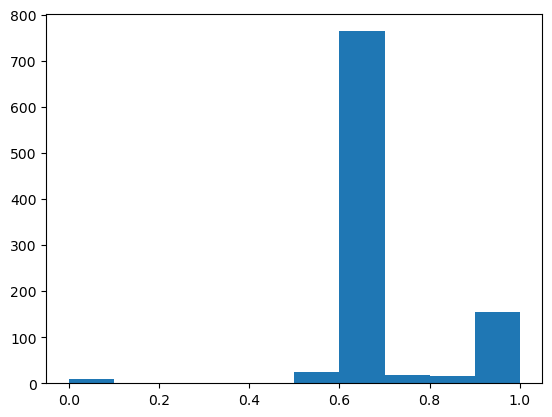

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# portfolio_values = []
# budget = 10000
# budgets = []
# obs, info = testing_env.reset()
# prev_close = obs[0]
# asset_allocations = []
# actions = []
# while True:
#     action, _states = model.predict(obs, deterministic=True)
#     obs, reward, terminated, truncated, info = testing_env.step(action)
#     percent_change = (obs[0] - prev_close) / prev_close
#     prev_close = obs[0]
#     budget = budget * (1+percent_change)
#     budgets.append(budget)
#     portfolio_values.append(info['Portfolio Value'])
#     asset_allocations.append(info['Asset Allocation'])
#     actions.append(info['Action Taken'])
#     if terminated or truncated:
#         break
# plt.hist(np.array(asset_allocations), bins=10)

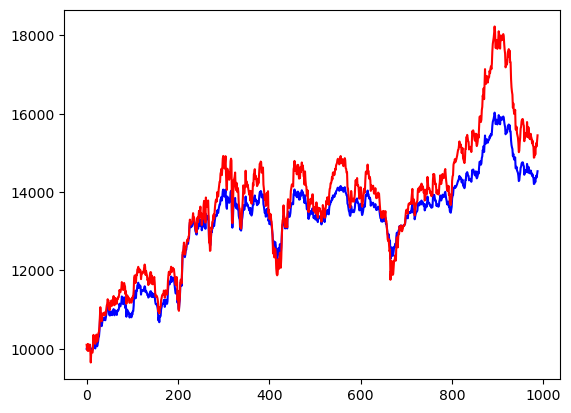

In [ ]:
# plt.figure()
# plt.plot(np.array(portfolio_values), "blue")
# plt.plot(np.array(budgets), "red")
# plt.show()

In [22]:
# from stable_baselines3 import DQN
# import optuna

# max_return = 0.0

# def objective(trial):
#     global max_return
#     learning_rate = trial.suggest_float('learning rate', 0.0001, 0.01)
#     gamma = trial.suggest_float('gamma', 0.95, 0.999)
#     exploration_fraction = trial.suggest_float('exploration fraction', 0.1, 0.3)
#     total_timesteps = trial.suggest_int('total_timesteps', 250 * 50, 250 * 1000)


#     model = DQN("MlpPolicy", training_env, learning_rate=learning_rate, 
#                 buffer_size=5000, gamma=gamma, exploration_fraction=exploration_fraction)
    

#     model.learn(total_timesteps=total_timesteps)

#     obs, info = validation_env.reset()
#     while True:
#         action, _states = model.predict(obs, deterministic=True)
#         obs, reward, terminated, truncated, info = validation_env.step(action)
#         if terminated or truncated:
#             break

#     raw_return = (validation_env.portfolio_value - validation_env.budget) / validation_env.budget
#     if raw_return > max_return:
#         model.save("RL_Agent")
#         max_return = raw_return
#     del model
#     return -raw_return

    


# study = optuna.create_study()
# study.optimize(objective, n_trials = 20, show_progress_bar=True)

# print(f'Best Parameters: {study.best_params}')
# print(f'Best value: {study.best_value}')

In [23]:
# next step: think more about metrics to add to analyze performance during training
# use optuna for fine-tuning after experimenting with training first
# also add tests for custom environment 